In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load data
df = pd.read_csv('shopify_products_for_nlp.csv')

# Preprocessing - Text data
df['Title'].fillna('', inplace=True)  # Replace missing values in 'Title' column with empty string
df['Description'].fillna('', inplace=True)  # Replace missing values in 'Description' column with empty string
title_description = df['Title'] + ' ' + df['Description']
vectorizer = TfidfVectorizer()
text_vectors = vectorizer.fit_transform(title_description)

# Preprocessing - Categorical data
tags = df['Tags']
tags_encoded = pd.get_dummies(tags, prefix='tag')

# User-Item Matrix
user_item_matrix = pd.concat([tags_encoded, pd.DataFrame(text_vectors.toarray())], axis=1)

# Collaborative Filtering
user_similarity = cosine_similarity(user_item_matrix)
item_similarity = cosine_similarity(user_item_matrix.T)

# Recommendation Generation
def user_based_recommendation(user_id, num_recommendations):
    similar_users = np.argsort(user_similarity[user_id])
    recommended_items = [item_id for item_id in similar_users[-num_recommendations:]]
    return recommended_items

def item_based_recommendation(item_id, num_recommendations):
    similar_items = np.argsort(item_similarity[item_id])
    recommended_items = [item_id for item_id in similar_items[-num_recommendations:]]
    return recommended_items

# Questions and Answers
emotions = {
    'Love and romance': 'love',
    'Happiness and joy': 'happiness',
    'Peace and tranquility': 'peace',
    'Inspiration and motivation': 'inspiration',
    'Sentimental and nostalgic': 'nostalgia',
    'Other': 'other'
}

occasions = {
    'Birthday': 'birthday',
    'Anniversary': 'anniversary',
    'Housewarming': 'housewarming',
    'Holiday celebration': 'holiday',
    'Other': 'other'
}

interests = {
    'Animals': 'animals',
    'Nature': 'nature',
    'Inspiring quotes': 'quotes',
    'Art/Design': 'art',
    'Constructions': 'constructions',
    'Zodiac': 'zodiac',
    'Other': 'other'
}

creativity_expressions = {
    'Through art (painting, drawing, sculpting, etc.)': 'art',
    'Through writing or other forms of creative writing': 'writing',
    'Through music or playing a musical instrument': 'music',
    'Through cooking or baking': 'cooking',
    'Through other': 'other'
}

audience = {
    'Child Audience': 'child',
    'Teen Audience': 'teen',
    'Adult Audience': 'adult',
    'Senior Audience': 'senior'
}

budget_ranges = {
    '$25-50': [25, 50],
    '$50-75': [50, 75],
    '$75-100': [75, 100],
    '$100-150': [100, 150],
    'Over $150': [150, float('inf')]
}

personal_styles = {
    'Casual and laid-back': 'casual',
    'Elegant and sophisticated': 'elegant',
    'Edgy and avant-garde': 'edgy',
    'Bohemian and free-spirited': 'bohemian',
    'Classic and timeless': 'classic'
}

def get_user_preferences():
    # Occasion/Event Question
    occasion = input("What is the occasion/event you need a gift for? (Select the corresponding number)\n1. Birthday\n2. Anniversary\n3. Housewarming\n4. Holiday celebration\n5. Other\n")

    # Emotions/Feelings Question
    emotions = input("What emotions or feelings would you like shown in your gift? (Select the corresponding number)\n1. Love and romance\n2. Happiness and joy\n3. Peace and tranquility\n4. Inspiration and motivation\n5. Sentimental and nostalgic\n6. Other\n")

    # Targeted Gift Question
    targeted = input("Is the gift targeted? (Select the corresponding number)\n1. Yes\n2. No\n")

    # Hobbies and Interests Question
    hobbies_interests = input("Could you please tell me about the hobbies and interests of the receiver? (Select the corresponding number)\n1. Animals\n2. Nature\n3. Inspiring quotes\n4. Art/Design\n5. Constructions\n6. Zodiac\n7. Other\n")

    # Personal Style and Aesthetic Preferences Question
    personal_style = input("How would you describe your personal style and aesthetic preferences? (Select the corresponding number)\n1. Casual and laid-back\n2. Elegant and sophisticated\n3. Edgy and avant-garde\n4. Bohemian and free-spirited\n5. Classic and timeless\n")

    # Budget Question
    budget = input("How much are you willing to spend? (Select the corresponding number)\n1. $25-50\n2. $50-75\n3. $75-100\n4. $100-150\n5. Over $150\n")

    # Process the user preferences
    user_preferences = {
        'Occasion': occasion,
        'Emotions': emotions,
        'Targeted': targeted,
        'Hobbies and Interests': hobbies_interests,
        'Personal Style': personal_style,
        'Budget': budget
    }



# Get user preferences
user_preferences = get_user_preferences()

# Example usage
user_id = 0
num_recommendations = 5
user_recommendations = user_based_recommendation(user_id, num_recommendations)

FileNotFoundError: [Errno 2] No such file or directory: 'shopify_products_for_nlp.csv'

**TEST CODE 2**

In [ ]:
import pandas as pd
product_descriptions = pd.read_csv('shopify_products_for_nlp.csv')
product_descriptions.shape

(1101, 5)

# show data

In [ ]:
# show exist values
product_descriptions.head()

,Product ID,Title,Description,Tags,Google Shopping - Color
0,3926939631680,Premium Engraved Crystal - 3x2x2 Inches - 2 Pe...,"<ul class=""a-unordered-list a-vertical a-spaci...","crystal, engraved, gift, paperweight",NaN
1,3930007568448,3D Engraved Medium Crystal - Perfect Photo Gif...,"<ul class=""a-unordered-list a-vertical a-spaci...",NaN,NaN
2,3930009468992,"Heart-shaped Crystal Photo Frame - Engraved, 4...","<ul class=""a-unordered-list a-vertical a-spaci...",NaN,NaN
3,3930019430464,XL Rectangle Engraved Crystal - 4x6x3 Size - 3...,"<ul class=""a-unordered-list a-vertical a-spaci...",NaN,NaN
4,3933235445824,Personalized Keychain with Custom Photo and LE...,<p>Looking for a unique and thoughtful gift? L...,NaN,NaN


In [ ]:
product_descriptions1 = product_descriptions.head(100)
# product_descriptions1.iloc[:,1]

product_descriptions1["Description"].head(10)

0    <ul class="a-unordered-list a-vertical a-spaci...
1    <ul class="a-unordered-list a-vertical a-spaci...
2    <ul class="a-unordered-list a-vertical a-spaci...
3    <ul class="a-unordered-list a-vertical a-spaci...
4    <p>Looking for a unique and thoughtful gift? L...
5    <ul class="a-unordered-list a-vertical a-spaci...
6    <ul class="a-unordered-list a-vertical a-spaci...
7    <ul class="a-unordered-list a-vertical a-spaci...
8    <p>Looking for the perfect gift but not sure w...
9    <p>Illuminate any of our 3D etched crystals wi...
Name: Description, dtype: object

#### Feature extraction from product descriptions

Converting the text in product description into numerical data for analysis

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction import _stop_words
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

## Extract Unique Keywords from descriptions

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import re

# Read the CSV file into a DataFrame
data = pd.read_csv('shopify_products_for_nlp.csv')

# Extract the 'description' column
descriptions = data['Description']

# Create a list to store the unique keywords for each description
unique_keywords_list = []

# Iterate over each description
for description in descriptions:
    # Skip any missing or invalid values
    if pd.isnull(description):
        unique_keywords_list.append('')
        continue

    # Convert description to string
    description = str(description)

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(description, 'html.parser')

    # Extract text from the HTML
    text = soup.get_text()

    # Split the text into individual words
    words = re.findall(r'\b\w+\b', text.lower())

    # Add the words to the list of unique keywords
    unique_keywords = list(set(words))
    unique_keywords_list.append(', '.join(unique_keywords))

# Add the unique keywords list as a new column to the DataFrame
data['unique_keywords'] = unique_keywords_list

# Export the updated DataFrame to a new CSV file
data.to_csv('products+descriptions_keywords.csv', index=False)

In [ ]:
product_descriptions_keywords = pd.read_csv('products+descriptions_keywords.csv')
# Drop the 5th column
product_descriptions_keywords = product_descriptions_keywords.drop(product_descriptions_keywords.columns[4], axis=1)
#show new data
product_descriptions_keywords.head(5)

,Product ID,Title,Description,Tags,unique_keywords
0,3926939631680,Premium Engraved Crystal - 3x2x2 Inches - 2 Pe...,"<ul class=""a-unordered-list a-vertical a-spaci...","crystal, engraved, gift, paperweight","stunning, choosing, by, elegance, meaningful, ..."
1,3930007568448,3D Engraved Medium Crystal - Perfect Photo Gif...,"<ul class=""a-unordered-list a-vertical a-spaci...",NaN,"stunning, choosing, by, elegance, meaningful, ..."
2,3930009468992,"Heart-shaped Crystal Photo Frame - Engraved, 4...","<ul class=""a-unordered-list a-vertical a-spaci...",NaN,"stunning, choosing, by, elegance, meaningful, ..."
3,3930019430464,XL Rectangle Engraved Crystal - 4x6x3 Size - 3...,"<ul class=""a-unordered-list a-vertical a-spaci...",NaN,"stunning, choosing, by, elegance, meaningful, ..."
4,3933235445824,Personalized Keychain with Custom Photo and LE...,<p>Looking for a unique and thoughtful gift? L...,NaN,"dark, features, than, will, to, chosen, keepsa..."


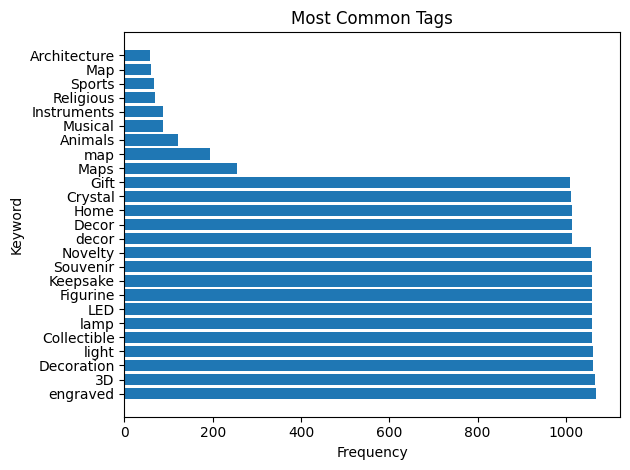

In [ ]:
import pandas as pd
from collections import Counter
import re

# Concatenate all keywords into a single string
all_keywords = ', '.join(product_descriptions_keywords['Tags'].astype(str))

# Extract basic keywords using regular expression
basic_keywords = re.findall(r'\b\w+\b', all_keywords)

# Count the frequency of each basic keyword
keyword_counts = Counter(basic_keywords)

# Get the most common keywords
top_keywords = keyword_counts.most_common(25)

# Extract the keywords and frequencies for plotting
keywords, frequencies = zip(*top_keywords)

# Plot the most common keywords
plt.barh(keywords, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.title('Most Common Tags')
plt.tight_layout()
plt.show()

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["Description"])
X1

<100x1093 sparse matrix of type '<class 'numpy.int64'>'
	with 8349 stored elements in Compressed Sparse Row format>


**Fitting K-Means to the dataset**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


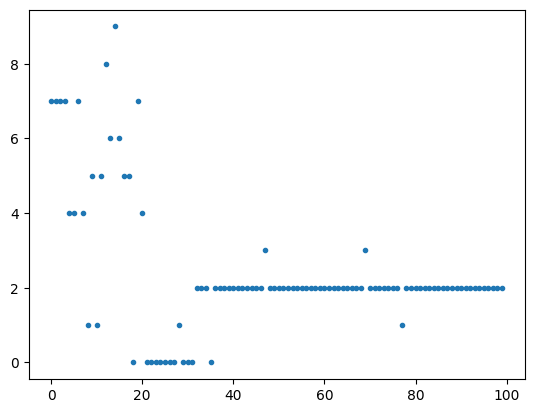

In [ ]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

#### Top words in each cluster based on product description

In [3]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Define your input data X1
X1 = "This is test text - mom love dogs"
# Optimal clusters
true_k = 10

# Initialize and fit the K-means model
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.vocabulary_
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()

ValueError: could not convert string to float: 'This is test text - mom love dogs'

#### Predicting clusters based on key search words

test map recommendation

In [ ]:
print("Cluster ID:")
Y = vectorizer.transform(["Map"])
prediction = model.predict(Y)
print(prediction)

test flower keyword recommendation

In [ ]:
print("Cluster ID:")
Y = vectorizer.transform(["Flower"])
prediction = model.predict(Y) # prédire les produits qui ont une liaison avec le mot spécifié
print(prediction)



<br> <br> <br>


## TEST CODE 4

In [ ]:
import csv

class Questionnaire:
    def __init__(self):
        self.age = ""
        self.location = ""
        # etc pour toutes les questions

    def analyze_answers(self):
    # Assign tags based on user answers
        if self.age == "18-25 years old":
            self.tags.append("young")
        elif self.age == "26-35 years old":
            self.tags.append("adult")

        if self.location == "Canada":
            self.tags.append("canadian")
        elif self.location == "USA":
            self.tags.append("american")
        elif self.location == "Europe":
            self.location("europian")
        else:
            self.location("others")

        if self.personal_style == "Casual and laid-back":
            self.tags.append("casual")

    # And so on for each question


        return self.tags

# Product ID,Title,Description,Tags,Google Shopping - Color
class Product:
    def __init__(self, product_id, title, description, tags):
        self.product_id = product_id
        self.title = title
        self.description = description
        self.tags = tags

    def calculate_match_score(self, questionnaire):
        # Calcul du score de correspondance entre le questionnaire et le produit
        match_score = 0
        for tag in questionnaire.tags:
            if tag in self.tags:
                match_score += 1
        return match_score


def recommend_product(questionnaire):
    best_product = None
    best_score = 0

    # Lecture des produits depuis le fichier CSV
    with open('data(6).csv', 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Ignorer l'en-tête du fichier

        # Vérifier si le fichier est vide
        if not reader:
            return None

        for row in reader:
            product_id = row[0]
            title = row[1]
            description = row[2]
            tags = row[3]

            product = Product(product_id, title, description, tags)
            match_score = product.calculate_match_score(questionnaire)

            if match_score > best_score:
                best_product = product
                best_score = match_score

    return best_product

# Interface utilisateur
def user_interface():
    questionnaire = Questionnaire()

    # Renseigner le questionnaire (à compléter avec les entrées utilisateur)
    questionnaire.age = "26-35 years old"
    questionnaire.location = "United States"
    # etc pour toutes les questions

    # Analyse des réponses du questionnaire
    questionnaire.analyze_answers()

    # Recommandation du produit
    recommended_product = recommend_product(questionnaire)

    # Affichage de la recommandation
    if recommended_product is None:
        print("Aucun produit recommandé.")
    else:
        print("Produit recommandé :")
        print("ID :", recommended_product.product_id)
        print("Titre :", recommended_product.title)
        print("Description :", recommended_product.description)


# Tests unitaires
def run_tests():
    # Création d'un questionnaire de test
    questionnaire = Questionnaire()
    questionnaire.age = "18-25 years old"
    questionnaire.location = "Canada"
    # etc pour toutes les questions
    questionnaire.analyze_answers()

    # Création de produits de test
    product1 = Product("1", "Titre 1", "Description 1", ["style1", "color2"])
    product2 = Product("2", "Titre 2", "Description 2", ["style2", "color3"])
    product3 = Product("3", "Titre 3", "Description 3", ["style1", "color3"])

    # Calcul des scores de correspondance
    score1 = product1.calculate_match_score(questionnaire)
    score2 = product2.calculate_match_score(questionnaire)
    score3 = product3.calculate_match_score(questionnaire)

    # Vérification des résultats
    assert score1 == 2
    assert score2 == 0
    assert score3 == 1


if __name__ == "__main__":
    # Exécuter l'interface utilisateur
   
    user_interface()

    # Exécuter les tests unitaires
    run_tests()

IndexError: list index out of range